In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# L
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin1', low_memory=False)

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (181691, 135)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
cols = ['iyear', 'imonth', 'country_txt', 'region_txt', 'attacktype1_txt', 'targtype1_txt', 'nkill', 'nwound', 'gname']
df = df[cols]

df.head()


,iyear,imonth,country_txt,region_txt,attacktype1_txt,targtype1_txt,nkill,nwound,gname
0,1970,7,Dominican Republic,Central America & Caribbean,Assassination,Private Citizens & Property,1.0,0.0,MANO-D
1,1970,0,Mexico,North America,Hostage Taking (Kidnapping),Government (Diplomatic),0.0,0.0,23rd of September Communist League
2,1970,1,Philippines,Southeast Asia,Assassination,Journalists & Media,1.0,0.0,Unknown
3,1970,1,Greece,Western Europe,Bombing/Explosion,Government (Diplomatic),NaN,NaN,Unknown
4,1970,1,Japan,East Asia,Facility/Infrastructure Attack,Government (Diplomatic),NaN,NaN,Unknown


In [5]:
df['nkill'] = df['nkill'].fillna(0)
df['nwound'] = df['nwound'].fillna(0)

print(df.isnull().sum())


iyear              0
imonth             0
country_txt        0
region_txt         0
attacktype1_txt    0
targtype1_txt      0
nkill              0
nwound             0
gname              0
dtype: int64


In [6]:
print("Number of attacks:", df.shape[0])
print("Years covered:", df['iyear'].min(), "-", df['iyear'].max())
print("Countries affected:", df['country_txt'].nunique())


Number of attacks: 181691
Years covered: 1970 - 2017
Countries affected: 205


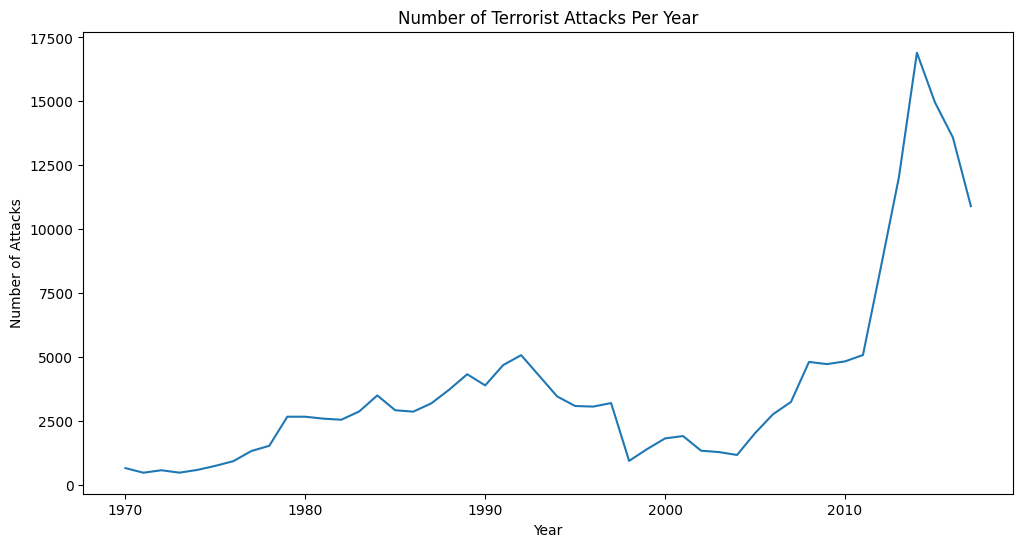

In [7]:
attacks_per_year = df.groupby('iyear').size()

plt.figure(figsize=(12,6))
attacks_per_year.plot()
plt.title("Number of Terrorist Attacks Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5860\476077073.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='rocket')


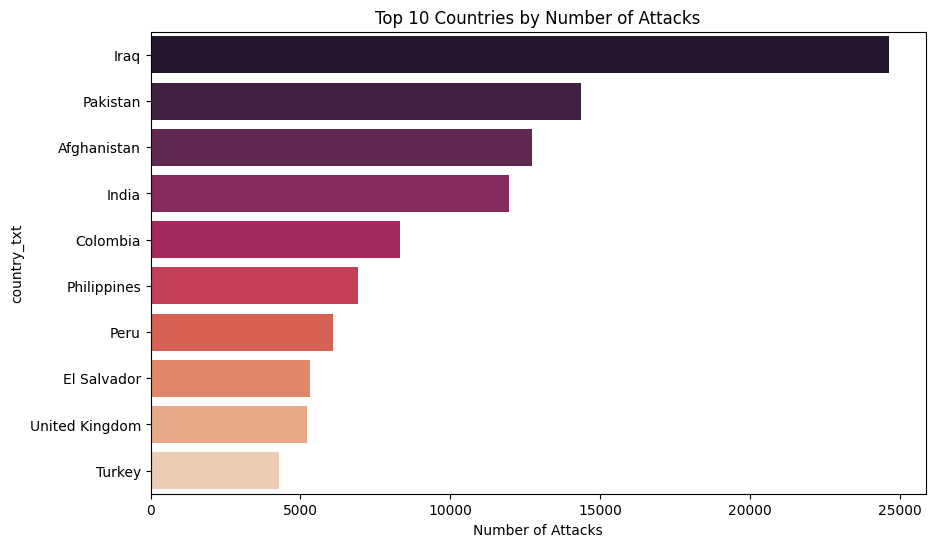

In [8]:
top_countries = df['country_txt'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='rocket')
plt.title("Top 10 Countries by Number of Attacks")
plt.xlabel("Number of Attacks")
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5860\1394630038.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attack_types.values, y=attack_types.index, palette='mako')


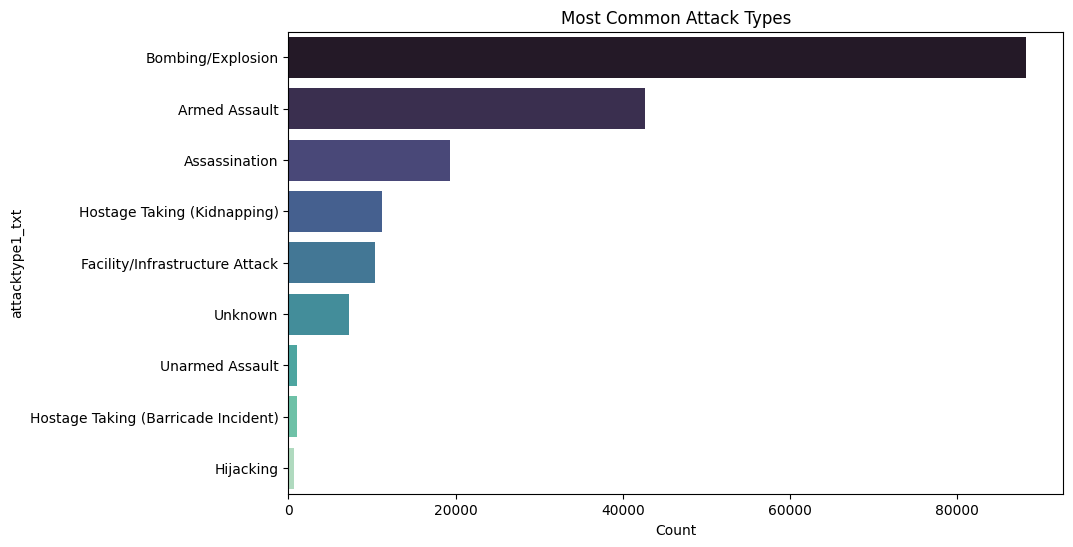

In [9]:
attack_types = df['attacktype1_txt'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=attack_types.values, y=attack_types.index, palette='mako')
plt.title("Most Common Attack Types")
plt.xlabel("Count")
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5860\2923555101.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_casualties.values, y=region_casualties.index, palette='flare')


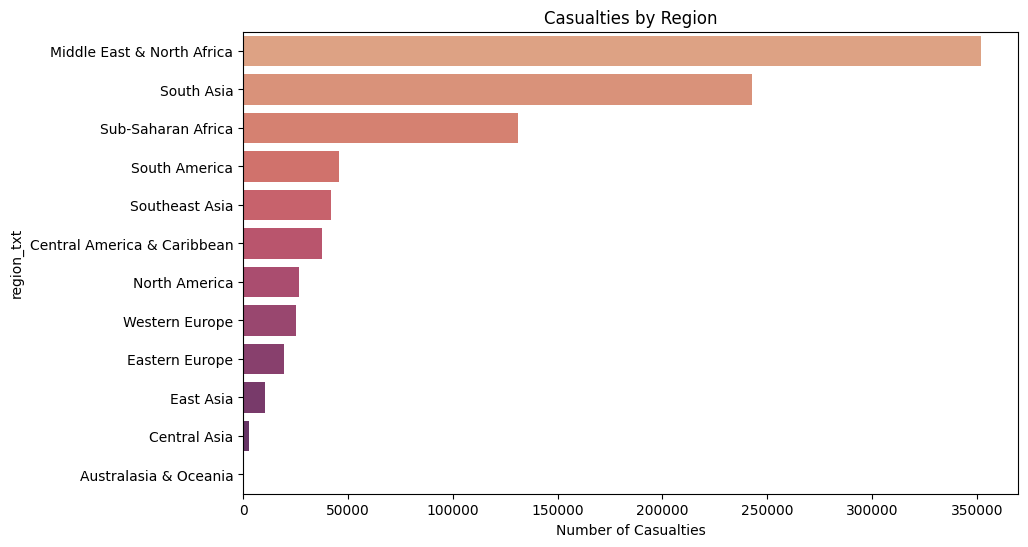

In [10]:
df['casualties'] = df['nkill'] + df['nwound']

region_casualties = df.groupby('region_txt')['casualties'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=region_casualties.values, y=region_casualties.index, palette='flare')
plt.title("Casualties by Region")
plt.xlabel("Number of Casualties")
plt.show()


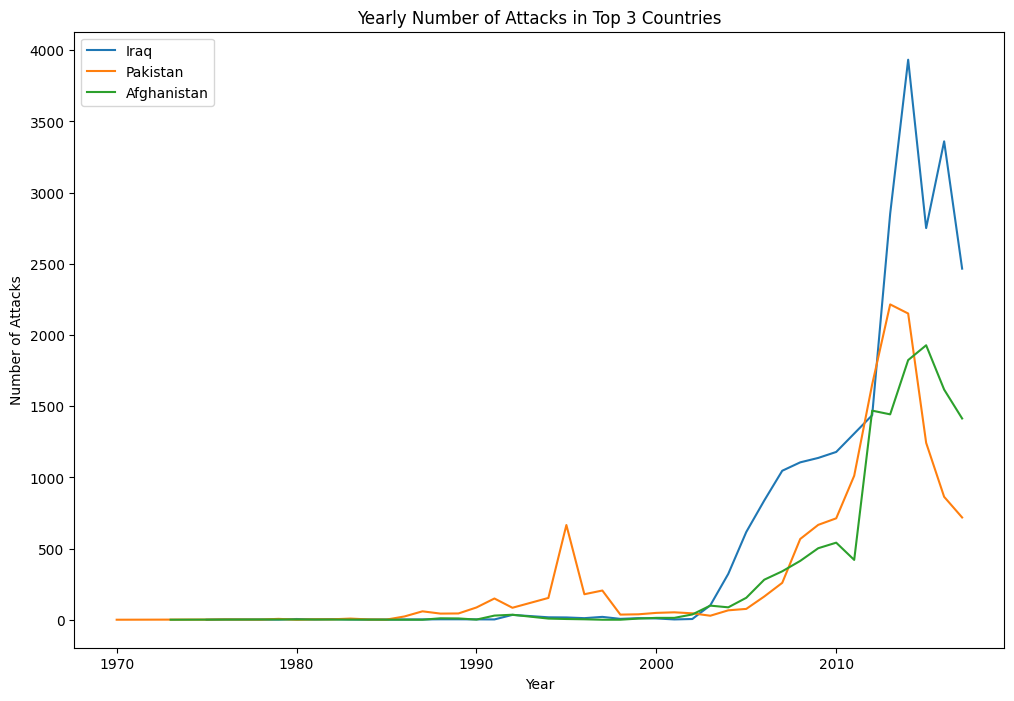

In [11]:
top3_countries = top_countries.index[:3]

plt.figure(figsize=(12,8))
for country in top3_countries:
    subset = df[df['country_txt'] == country]
    yearly = subset.groupby('iyear').size()
    plt.plot(yearly.index, yearly.values, label=country)

plt.title("Yearly Number of Attacks in Top 3 Countries")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.legend()
plt.show()


In [12]:
df.to_csv('gtd_cleaned.csv', index=False)
